In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from wordcloud import WordCloud

In [18]:
def load_data(file_path):
    data = pd.read_csv(file_path)
    return data
data =load_data("US_Accidents_Dec21_updated.csv")

In [19]:
print(data.head())

    ID  Severity           Start_Time             End_Time  Start_Lat  \
0  A-1         3  2016-02-08 00:37:08  2016-02-08 06:37:08  40.108910   
1  A-2         2  2016-02-08 05:56:20  2016-02-08 11:56:20  39.865420   
2  A-3         2  2016-02-08 06:15:39  2016-02-08 12:15:39  39.102660   
3  A-4         2  2016-02-08 06:51:45  2016-02-08 12:51:45  41.062130   
4  A-5         3  2016-02-08 07:53:43  2016-02-08 13:53:43  39.172393   

   Start_Lng    End_Lat    End_Lng  Distance(mi)  \
0 -83.092860  40.112060 -83.031870         3.230   
1 -84.062800  39.865010 -84.048730         0.747   
2 -84.524680  39.102090 -84.523960         0.055   
3 -81.537840  41.062170 -81.535470         0.123   
4 -84.492792  39.170476 -84.501798         0.500   

                                         Description  ...  Roundabout Station  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...       False   False   
1                 At OH-4/OH-235/Exit 41 - Accident.  ...       False   False   
2    

In [20]:
def preprocess_columns(df):
    # Separate numeric and categorical columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    boolean_cols = df.select_dtypes(include=['bool']).columns
    
    # Preprocess numeric columns (handle missing values)
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
    
    # Preprocess categorical columns (encode labels)
    label_encoder = LabelEncoder()
    for col in categorical_cols:
        df[col] = label_encoder.fit_transform(df[col])
    
    # No preprocessing required for boolean columns
    
    return df
data=preprocess_columns(data)

In [21]:
data

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,0,3,1,0,40.108910,-83.092860,40.112060,-83.031870,3.230,253970,...,False,False,False,False,False,False,1,1,1,1
1,1111111,2,2,1,39.865420,-84.062800,39.865010,-84.048730,0.747,156073,...,False,False,False,False,False,False,1,1,1,1
2,2067565,2,3,2,39.102660,-84.524680,39.102090,-84.523960,0.055,128035,...,False,False,False,False,False,False,1,1,1,0
3,2178676,2,4,3,41.062130,-81.537840,41.062170,-81.535470,0.123,102168,...,False,False,False,False,False,False,1,1,0,0
4,2289787,3,5,4,39.172393,-84.492792,39.170476,-84.501798,0.500,149103,...,False,False,False,False,False,False,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,2050378,2,466417,468291,34.002480,-117.379360,33.998880,-117.370940,0.543,146273,...,False,False,False,False,False,False,0,0,0,0
2845338,2050379,2,466445,468317,32.766960,-117.148060,32.765550,-117.153630,0.338,95116,...,False,False,False,False,False,False,0,0,0,0
2845339,2050381,2,466439,468310,33.775450,-117.847790,33.777400,-117.857270,0.561,114238,...,False,False,False,False,False,False,0,0,0,0
2845340,2050382,2,466439,468311,33.992460,-118.403020,33.983110,-118.395650,0.772,87484,...,False,False,False,False,False,False,0,0,0,0


In [22]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

def perform_feature_selection(data, target_column, num_features=5):

    # Separate features and target variable
    X = data.drop(columns=[target_column])
    y = data[target_column]

    # Perform feature selection using SelectKBest with f_regression
    selector = SelectKBest(score_func=f_regression, k=num_features)
    X_selected = selector.fit_transform(X, y)

    # Get selected feature names
    selected_feature_names = X.columns[selector.get_support()]

    return selected_feature_names,y

# Example usage)
features ,y= perform_feature_selection(data, 'Severity', num_features=10)
data = data[features]


In [23]:
features

Index(['Start_Time', 'End_Time', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Description', 'Zipcode', 'Timezone',
       'Weather_Timestamp'],
      dtype='object')

In [24]:
data

,Start_Time,End_Time,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Zipcode,Timezone,Weather_Timestamp
0,1,0,-83.092860,40.112060,-83.031870,3.230,253970,184312,1,1
1,2,1,-84.062800,39.865010,-84.048730,0.747,156073,189224,1,3
2,3,2,-84.524680,39.102090,-84.523960,0.055,128035,186925,1,2
3,4,3,-81.537840,41.062170,-81.535470,0.123,102168,186230,1,4
4,5,4,-84.492792,39.170476,-84.501798,0.500,149103,187126,1,5
...,...,...,...,...,...,...,...,...,...,...
2845337,466417,468291,-117.379360,33.998880,-117.370940,0.543,146273,299480,3,201654
2845338,466445,468317,-117.148060,32.765550,-117.153630,0.338,95116,295722,3,201662
2845339,466439,468310,-117.847790,33.777400,-117.857270,0.561,114238,303235,3,201662
2845340,466439,468311,-118.403020,33.983110,-118.395650,0.772,87484,282701,3,201660


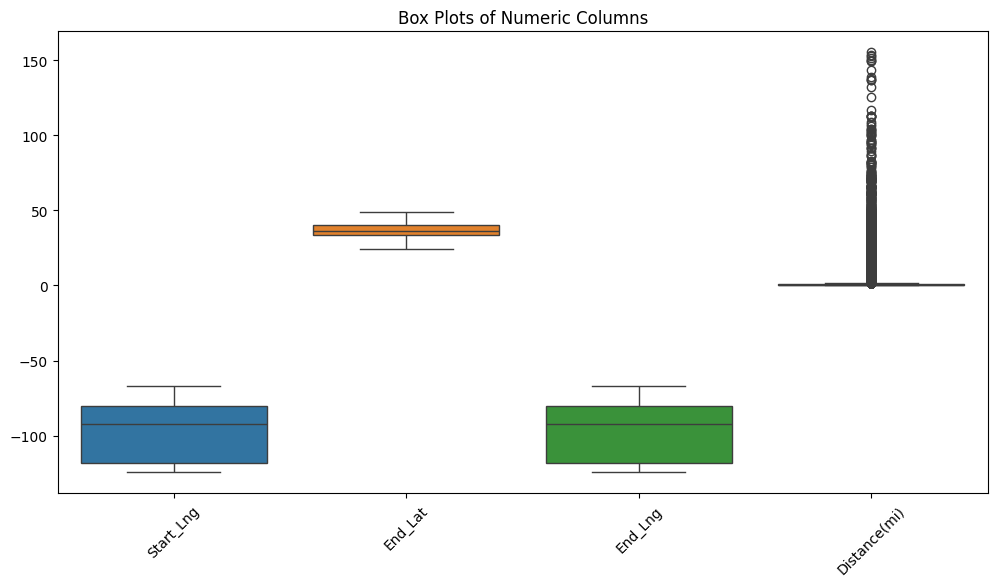

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

def visualize_outliers(df):
    # Check if the input is a DataFrame
    if isinstance(df, pd.DataFrame):
        # Make box plots for numeric columns
        numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=df[numeric_columns])
        plt.title('Box Plots of Numeric Columns')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print("Input 'df' is not a pandas DataFrame. Please provide a valid DataFrame.")

visualize_outliers(data)

In [26]:
def remove_outliers(df):
    cleaned_df = df.copy()
    for column in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_df = cleaned_df[(cleaned_df[column] >= lower_bound) & (cleaned_df[column] <= upper_bound)]
    return cleaned_df



data=remove_outliers(data)

# Exploratory Data Analysis (EDA)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 2565552 entries, 1 to 2845341
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Start_Time         int32  
 1   End_Time           int32  
 2   Start_Lng          float64
 3   End_Lat            float64
 4   End_Lng            float64
 5   Distance(mi)       float64
 6   Description        int32  
 7   Zipcode            int32  
 8   Timezone           int32  
 9   Weather_Timestamp  int32  
dtypes: float64(4), int32(6)
memory usage: 156.6 MB
None

Summary Statistics:


         Start_Time      End_Time     Start_Lng       End_Lat       End_Lng  \
count  2.565552e+06  2.565552e+06  2.565552e+06  2.565552e+06  2.565552e+06   
mean   1.036564e+06  1.182774e+06 -9.737062e+01  3.613169e+01 -9.737047e+01   
std    5.683907e+05  6.924968e+05  1.834378e+01  5.369987e+00  1.834374e+01   
min    0.000000e+00  1.000000e+00 -1.245481e+02  2.456601e+01 -1.245457e+02   
25%    5.547448e+05  5.761128e+05 -1.180899e+02  3.333280e+01 -1.180902e+02   
50%    1.047985e+06  1.172828e+06 -9.306529e+01  3.589066e+01 -9.306516e+01   
75%    1.547572e+06  1.805527e+06 -8.039326e+01  4.006459e+01 -8.039273e+01   
max    1.959332e+06  2.351504e+06 -6.711317e+01  4.900214e+01 -6.710924e+01   

       Distance(mi)   Description       Zipcode      Timezone  \
count  2.565552e+06  2.565552e+06  2.565552e+06  2.565552e+06   
mean   3.624892e-01  5.220045e+05  2.016183e+05  1.582044e+00   
std    4.227331e-01  3.752730e+05  1.068586e+05  1.135837e+00   
min    0.000000e+00  0.00000

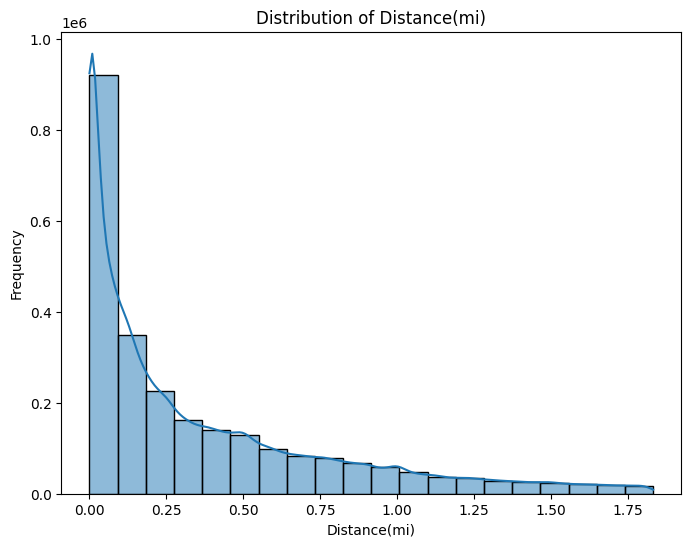


Correlation Matrix:
                   Start_Time  End_Time  Start_Lng   End_Lat   End_Lng  \
Start_Time           1.000000  0.998957   0.112237 -0.166050  0.112240   
End_Time             0.998957  1.000000   0.114772 -0.166176  0.114775   
Start_Lng            0.112237  0.114772   1.000000 -0.160490  1.000000   
End_Lat             -0.166050 -0.166176  -0.160490  1.000000 -0.160486   
End_Lng              0.112240  0.114775   1.000000 -0.160486  1.000000   
Distance(mi)         0.077960  0.082726   0.075274  0.086988  0.075282   
Description          0.576448  0.572732   0.281062 -0.250767  0.281064   
Zipcode             -0.106875 -0.108630  -0.935722  0.042237 -0.935722   
Timezone            -0.073431 -0.076544  -0.815143  0.105495 -0.815144   
Weather_Timestamp    0.955048  0.945353   0.088857 -0.155418  0.088860   

                   Distance(mi)  Description   Zipcode  Timezone  \
Start_Time             0.077960     0.576448 -0.106875 -0.073431   
End_Time               0.082

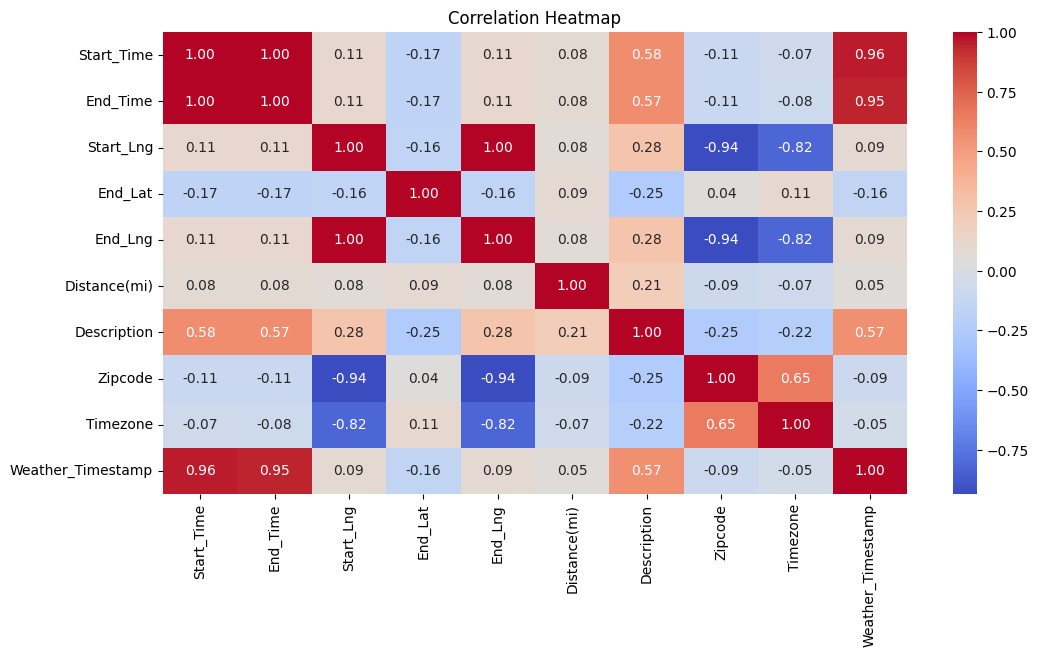

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def perform_eda(df):
    # Display basic information about the dataset

    # Display basic information about the dataset
    print("Dataset Information:")
    print(df.info())

    # Display summary statistics for numerical variables
    print("\nSummary Statistics:")
    print(df.describe())

    # Check for missing values
    print("\nMissing Values:")
    print(df.isnull().sum())

    # Explore numerical variables
    numerical_vars = ['Distance(mi)']
    for var in numerical_vars:
        plt.figure(figsize=(8, 6))
        sns.histplot(df[var], bins=20, kde=True)
        plt.xlabel(var)
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {var}')
        plt.show()

    # Correlation analysis
    correlation_matrix = df.corr()
    print("\nCorrelation Matrix:")
    print(correlation_matrix)

    # Visualize correlations using a heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()


# Example usage
perform_eda(data)


In [28]:
data['Start_Time'] = pd.to_datetime(data['Start_Time'])
data['End_Time'] = pd.to_datetime(data['End_Time'])

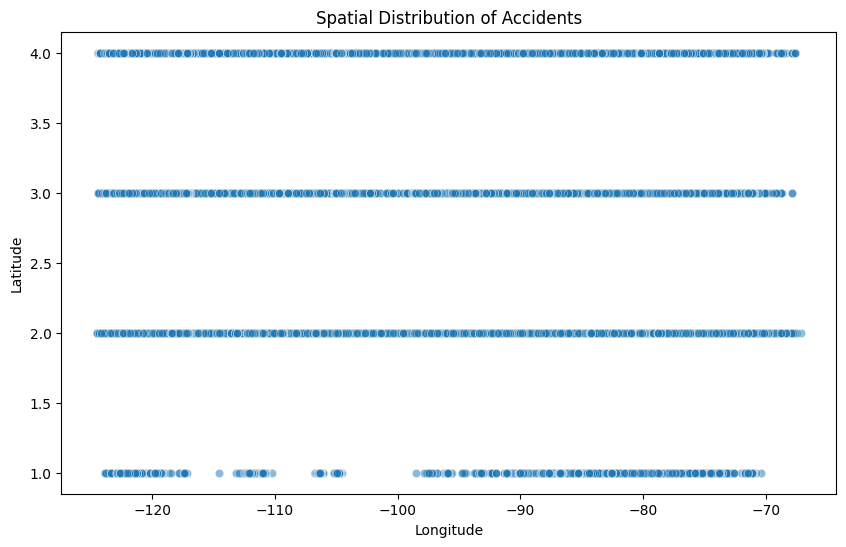

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

<Figure size 1000x600 with 0 Axes>

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Start_Lng'], y=y, alpha=0.5)
plt.title('Spatial Distribution of Accidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



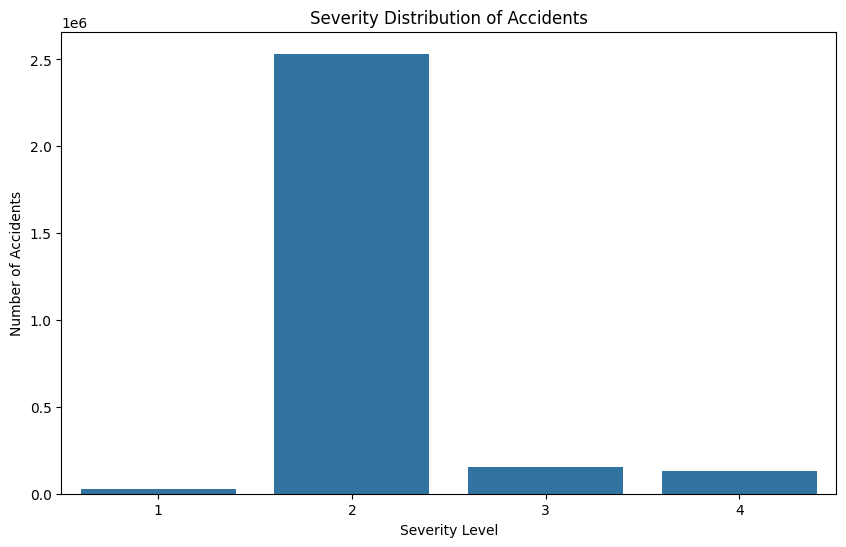

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x=y)
plt.title('Severity Distribution of Accidents')
plt.xlabel('Severity Level')
plt.ylabel('Number of Accidents')
plt.show()

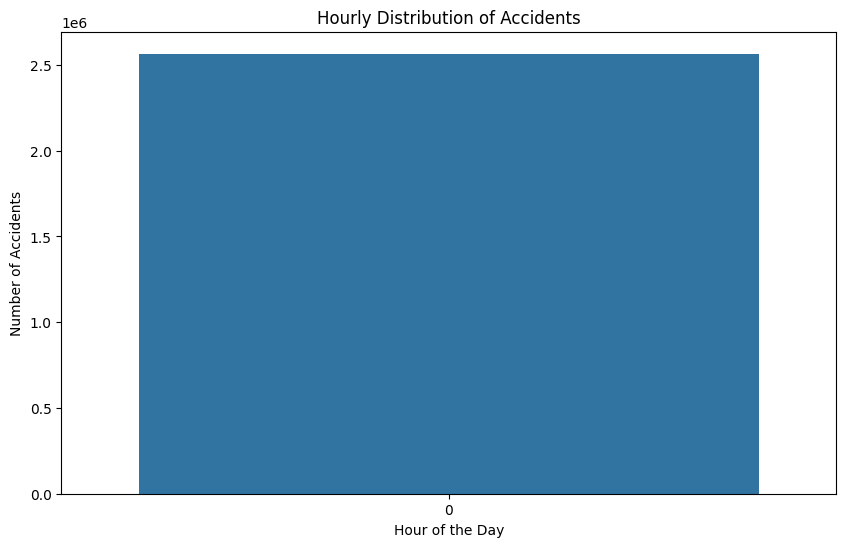

In [32]:
data['Hour'] = data['Start_Time'].dt.hour
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=data)
plt.title('Hourly Distribution of Accidents')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.show()

In [33]:
# For example, you can analyze the impact of weather on accidents
plt.figure(figsize=(10, 6))
sns.boxplot(x='Weather_Timestamp', y='Distance(mi)', data=data)
plt.title('Weather Impact on Accident Distance')
plt.xlabel('Weather Timestamp')
plt.ylabel('Distance (mi)')
plt.xticks(rotation=45)
plt.show()

KeyboardInterrupt: 

In [3]:
# Plot bar chart of accident frequencies by region (e.g., Zipcode)

plt.figure(figsize=(10, 6))
sns.countplot(x='Zipcode', data=data)
plt.title('Accident Frequencies by Zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


NameError: name 'data' is not defined

<Figure size 1000x600 with 0 Axes>